In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# TODO more SOM analysis and cleanup
# TODO own implementation based off of https://github.com/JustGlowing/minisom

In [11]:
data = pd.read_csv('../dataset/mapped_data.csv', sep=',')

# need to normalize data from SOMs
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# TODO comparison between normalization techniques (try Z-score normalization next)

print(norm_data)

         price  edhrecRank  edhrecSaltiness  manaValue  currency  \
0     0.000035    0.369006         0.321429   0.636364       1.0   
1     0.000070    0.369006         0.321429   0.636364       1.0   
2     0.006497    0.369006         0.321429   0.636364       1.0   
3     0.101823    0.369006         0.321429   0.636364       1.0   
4     0.003144    0.369006         0.321429   0.636364       0.0   
...        ...         ...              ...        ...       ...   
7942  0.001537    0.211725         0.166667   0.090909       1.0   
7943  0.000664    0.211725         0.166667   0.090909       1.0   
7944  0.006218    0.211725         0.166667   0.090909       1.0   
7945  0.003423    0.211725         0.166667   0.090909       1.0   
7946  0.005903    0.211725         0.166667   0.090909       1.0   

      gameAvailability  providerListing  hasFoil  hasNonFoil  supertypes  
0                  1.0              1.0      1.0         1.0         1.0  
1                  1.0           

In [18]:
# TODO try out non MINI, and other implementation 
som_size = 10
som = MiniSom(som_size, som_size, norm_data.shape[1], sigma=1.0, learning_rate=0.5)

som.train(norm_data.values, num_iteration=1000)

In [15]:
print(norm_data.shape[0])

7947


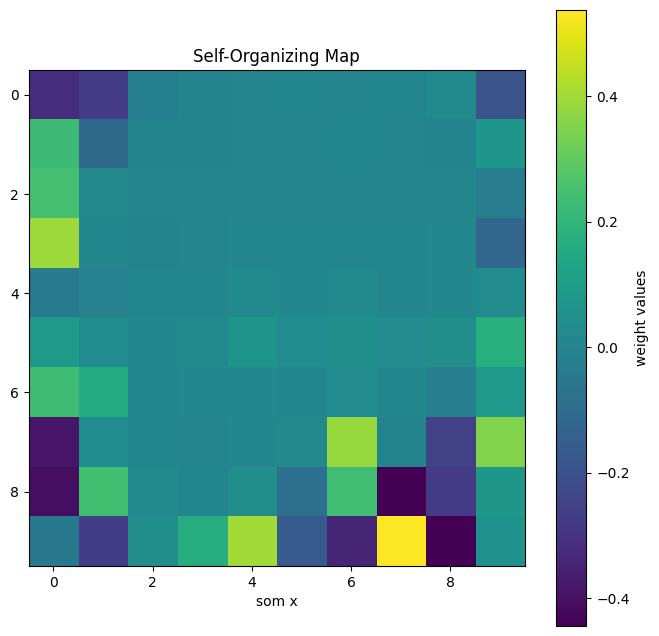

In [20]:
plt.figure(figsize=(8,8))
weights = som.get_weights()
plt.imshow(weights[:,:,0], interpolation='nearest', cmap='viridis')
plt.colorbar(label='weight values')
plt.title("Self-Organizing Map")
plt.xlabel("som x")
plt.show()


looks like there is some main clusters (yellow)

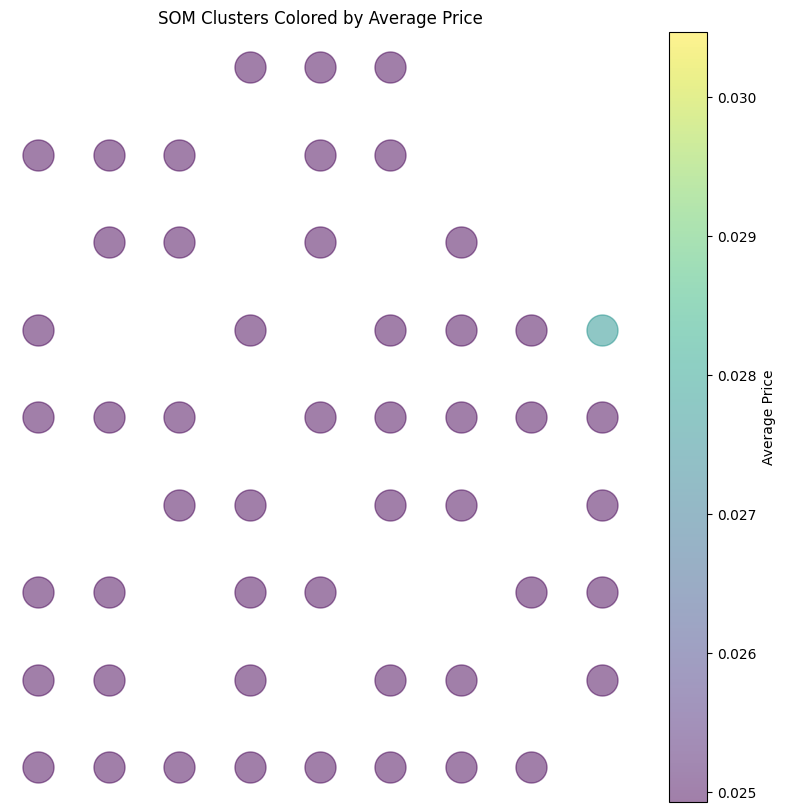

In [25]:
# Get the winning nodes for each data point
win_map = som.win_map(norm_data.values)

# Plot the SOM with color based on price
plt.figure(figsize=(10, 10))

for x in range(som_size):
    for y in range(som_size):
        # Get the points that map to this node
        points = win_map.get((x, y), [])
        
        # If there are points for this node, plot the average price
        if len(points) > 0:
            avg_price = np.mean(points, axis=0)[0]  # Get the mean of the price feature
            plt.scatter(x, y, c=avg_price, cmap='viridis', s=500, alpha=0.5)

plt.colorbar(label='Average Price')
plt.title('SOM Clusters Colored by Average Price')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.grid(False)
plt.axis('off')
plt.show()

In [27]:
# Create a DataFrame to store winning nodes and corresponding prices
price_data = []

for x in range(som_size):
    for y in range(som_size):
        # Get the points that map to this node
        points = win_map.get((x, y), [])
        
        if points:  # Check if there are points for this node
            # Compute the average price for this cluster
            avg_price = np.mean([point[0] for point in points])  # Assuming price is the first feature
            price_data.append({'Cluster': (x, y), 'Average Price': avg_price})

# Convert to DataFrame
price_df = pd.DataFrame(price_data)

print(price_df)

   Cluster  Average Price
0   (0, 1)       0.015684
1   (0, 2)       0.001319
2   (0, 3)       0.000294
3   (0, 5)       0.004668
4   (0, 6)       0.005691
5   (0, 8)       0.021982
6   (1, 1)       0.011457
7   (1, 2)       0.002462
8   (1, 3)       0.001365
9   (1, 5)       0.003751
10  (1, 7)       0.004514
11  (1, 8)       0.003872
12  (2, 1)       0.006046
13  (2, 4)       0.006136
14  (2, 5)       0.002057
15  (2, 7)       0.002738
16  (2, 8)       0.001930
17  (3, 1)       0.004035
18  (3, 2)       0.000939
19  (3, 3)       0.002824
20  (3, 4)       0.004334
21  (3, 6)       0.001147
22  (3, 9)       0.003095
23  (4, 1)       0.007140
24  (4, 3)       0.003217
25  (4, 5)       0.015334
26  (4, 7)       0.004635
27  (4, 8)       0.014199
28  (4, 9)       0.009602
29  (5, 1)       0.035997
30  (5, 2)       0.010880
31  (5, 4)       0.068377
32  (5, 5)       0.043232
33  (5, 6)       0.033701
34  (5, 8)       0.048635
35  (5, 9)       0.035940
36  (6, 1)       0.034739
37  (6, 2)  